# Lending Club Case Study
*By Ashish Tondon and Uday kumar Kolluru*

### Importing external modules

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data file

In [351]:
loadData = pd.read_csv('loan.csv');

/tmp/ipykernel_5965/101281369.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loadData = pd.read_csv('loan.csv');


In [352]:
loadData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Clean up

**Analysing data having bank or no value**

In [353]:
# Detecting missing values in all columns
info = loadData.isna().sum()

# Checking for columns where all values are null
info[info == loadData.shape[0]].count()

54

54 columns in the dataframe have all missing values. Its better to delete them as they are of no use.

In [354]:
listOfColumnsWithAllMissingValues = list(info[info == loadData.shape[0]].index)

print("Dropping because of all missing values in Columns", str(listOfColumnsWithAllMissingValues))

loadData.drop(columns=listOfColumnsWithAllMissingValues, inplace=True)

Dropping because of all missing values in Columns ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_

Now Checking for columns which have above 40% of missing values. And We found 3 columns with above 64% of missing value. Dropping all three columns.

In [355]:
percentageOfMissingValuesInEachColumn = (loadData.isna().sum()/loadData.shape[0]) * 100

listOfColumnsWith40perMissingValues = list(percentageOfMissingValuesInEachColumn[percentageOfMissingValuesInEachColumn > 40].index)

print("Dropping because of more then 64% missing values in Columns", str(listOfColumnsWith40perMissingValues))

loadData.drop(columns=listOfColumnsWith40perMissingValues, inplace=True)

Dropping because of more then 64% missing values in Columns ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


All Entries in *delinq_amnt* and *acc_now_delinq* columns are 0. So The column is of no use we can drop them.

In [356]:
listWithZeroValues = (loadData == 0).sum().sort_values(ascending=False)

listOfColumnsWithAllZeroValues = listWithZeroValues[listWithZeroValues == loadData.shape[0]].index

loadData.drop(columns=listOfColumnsWithAllZeroValues, inplace=True)

Remaining Columns with most entries are 0

In [357]:

(loadData == 0).sum().sort_values(ascending=False)

tax_liens                     39678
chargeoff_within_12_mths      39661
collections_12_mths_ex_med    39661
out_prncp                     38577
out_prncp_inv                 38577
total_rec_late_fee            37671
pub_rec                       37601
pub_rec_bankruptcies          37339
collection_recovery_fee       35935
recoveries                    35499
delinq_2yrs                   35405
inq_last_6mths                19300
revol_bal                       994
dti                             183
total_pymnt_inv                 165
funded_amnt_inv                 129
last_pymnt_amnt                  74
total_rec_prncp                  74
total_rec_int                    71
total_pymnt                      16
last_pymnt_d                      0
open_acc                          0
last_credit_pull_d                0
policy_code                       0
initial_list_status               0
total_acc                         0
revol_util                        0
application_type            

Colums tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med mostly have 0 and missing values only. So better to drop them. As these are of no use.

In [358]:
# loadData[["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"]].isna().sum(), (loadData[["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"]] == 0).sum()
loadData.drop(columns=["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"], inplace=True)

In [359]:
loadData.groupby("initial_list_status").id.count()

initial_list_status
f    39717
Name: id, dtype: int64

**We found following details:**
1. Column 'policy_code' repeating value '1' in all rows. It means all uses "Publicly available policy".
2. Column 'application_type' repeating value 'INDIVIDUAL' in all rows. It means all borrows in the dataset are Individual borrowers.
3. Column 'pymnt_plan' repeating value 'n' in all rows. It means all borrows in the dataset opting for same borrowing plan.
4. Column 'initial_list_status' repeating value 'f' in all rows. It means all borrows in the dataset have same initial listing status.

As all rows have same value for columns policy_code, application_type, pymnt_plan, initial_list_status. And We already noted the informations these columns can provide above. Now we can drop these columns as well. As these column can not provide any other information in further analysis.

In [360]:
loadData.drop(columns=["policy_code", "application_type", "pymnt_plan", "initial_list_status"], inplace=True)

**url** column contains account link like https://lendingclub.com/browse/loanDetail.action?loan_id=<loan_id> this column will not help us in further analysis. We are dropping the column.

In [361]:
loadData.drop(columns=["url"], inplace=True)

Following ate transactional columns which is used as identifier of a loan or borrow. We do not need these columns in futher analysis.
1. id
2. member_id

In [362]:
loadData.drop(columns=["id", "member_id"], inplace=True)

In [363]:
loadData.shape

(39717, 42)

In [364]:
loadData.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### Data Analysis

### Breaking Attributes as per following types:
1. Consumer Attributes: Column provides customer information.<br>
   > emp_title, emp_length, home_ownership, annual_inc, verification_status, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, total_acc, pub_rec_bankruptcies
   
2. Loan Attributes: Column provides loan information.<br>
   > loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, issue_d, loan_status, desc, purpose, title, revol_bal, revol_util, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, 

**Analyis 1**: *(Univariate Analysis)* for analysing grades of charged off loans. 

In [365]:

pivotGrade = pd.pivot_table(data=loadData.groupby("grade").loan_status.value_counts().reset_index(), 
                       index="grade", 
                       columns="loan_status", 
                       values="count", 
                       aggfunc=np.sum, 
                       margins=True)

# Calculating Charged Off percentage
pivotGrade["Charged Off"] = pivotGrade.apply(lambda row: round((row["Charged Off"]/row.All) * 100,2), axis=1)

# Removing other columns
pivotGrade.drop(columns=["Current", "Fully Paid", "All"], inplace=True)

pivotGrade.reset_index(inplace=True)

/tmp/ipykernel_5965/2653379724.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotGrade = pd.pivot_table(data=loadData.groupby("grade").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/2653379724.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotGrade = pd.pivot_table(data=loadData.groupby("grade").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/2653379724.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep cu

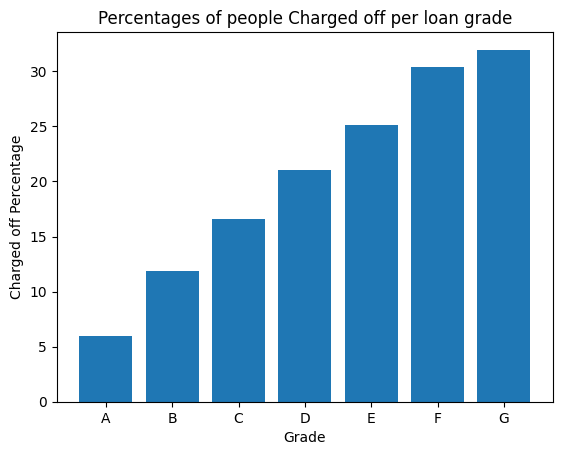

In [366]:
plt.bar(data=pivotGrade.loc[pivotGrade.grade != "All"], x="grade", height="Charged Off")
plt.xlabel("Grade")
plt.ylabel("Charged off Percentage")
plt.title("Percentages of people Charged off per loan grade")
plt.show()

**Analyis 2**: *(Univariate Analysis)* for analysing effect of interest rate on charged off loans

In [367]:
loadData["int_rate"] = loadData.int_rate.apply(lambda rate: float(rate.replace("%", "")))

In above step we cleaned intrest rate column by conveting it to float values. Removed '%' sign.

In [368]:

pivotInterestRate = pd.pivot_table(data=loadData.groupby("int_rate").loan_status.value_counts().reset_index(), 
                         values="count", 
                         index="int_rate", 
                         columns="loan_status", 
                         fill_value=0, 
                         margins=True, 
                         aggfunc=np.sum)

pivotInterestRate["Charged Off"] = pivotInterestRate.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)

pivotInterestRate.drop(labels=["All", "Fully Paid","Current"], axis=1, inplace=True)

/tmp/ipykernel_5965/4052609906.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotInterestRate = pd.pivot_table(data=loadData.groupby("int_rate").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/4052609906.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotInterestRate = pd.pivot_table(data=loadData.groupby("int_rate").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/4052609906.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used 

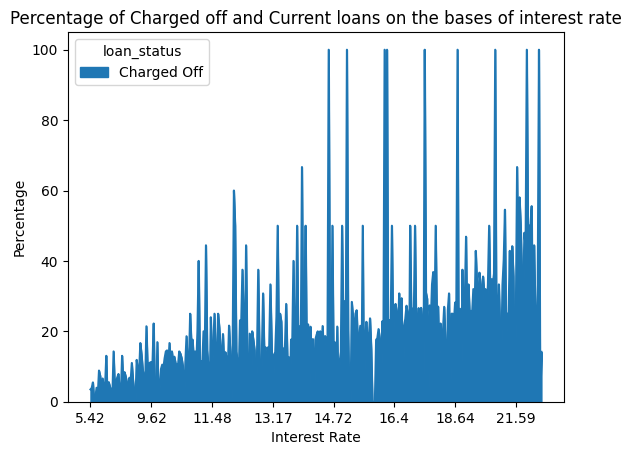

In [369]:
pivotInterestRate.plot.area()

plt.xlabel("Interest Rate")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off and Current loans on the bases of interest rate")

plt.show()

**Analyis 3**: *(Bivariate Analysis)* for analysing effect of loan term on charged off loans. Also the graph shows we do not have any "current" in 36 month period.

In [370]:
pivotLoanTerm = pd.pivot_table(data=loadData.groupby("term").loan_status.value_counts().reset_index(), 
                          values="count", 
                          index="term", 
                          columns="loan_status", 
                          fill_value=0, 
                          margins=True, 
                          aggfunc=np.sum)

pivotLoanTerm["Charged Off"] = pivotLoanTerm.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)
pivotLoanTerm["Current"] = pivotLoanTerm.apply(lambda row: round((row["Current"]/row["All"])*100, 2), axis=1)

pivotLoanTerm.drop(labels=["All","Fully Paid"], axis=1, inplace=True)
pivotLoanTerm.reset_index(inplace=True)

/tmp/ipykernel_5965/2623822651.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotLoanTerm = pd.pivot_table(data=loadData.groupby("term").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/2623822651.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotLoanTerm = pd.pivot_table(data=loadData.groupby("term").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/2623822651.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To kee

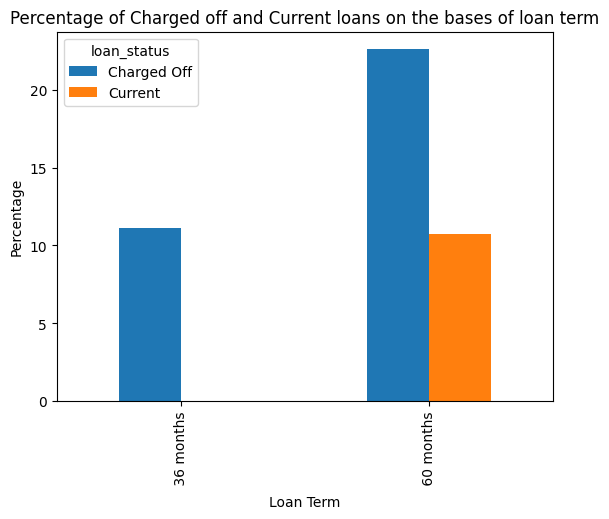

In [371]:
pivotLoanTerm.loc[pivotLoanTerm.term != "All"].plot.bar(x="term")

plt.xlabel("Loan Term")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off and Current loans on the bases of loan term")

plt.show()

**Analyis 4**: *(Univariate Analysis)* for analysing effect of home ownership on charged off loans.

In [372]:
pivotHomeOwnership = pd.pivot_table(data=loadData.groupby("home_ownership").loan_status.value_counts().reset_index(), 
                          values="count", 
                          index="home_ownership", 
                          columns="loan_status", fill_value=0, margins=True, aggfunc=np.sum)

pivotHomeOwnership["Charged Off"] = pivotHomeOwnership.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)
pivotHomeOwnership.sort_values(["Charged Off"], ascending=False).head(50)
pivotHomeOwnership.drop(labels=["All", "Fully Paid","Current"], axis=1, inplace=True)
pivotHomeOwnership.reset_index(inplace=True)


/tmp/ipykernel_5965/3031071370.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotHomeOwnership = pd.pivot_table(data=loadData.groupby("home_ownership").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/3031071370.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotHomeOwnership = pd.pivot_table(data=loadData.groupby("home_ownership").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/3031071370.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable

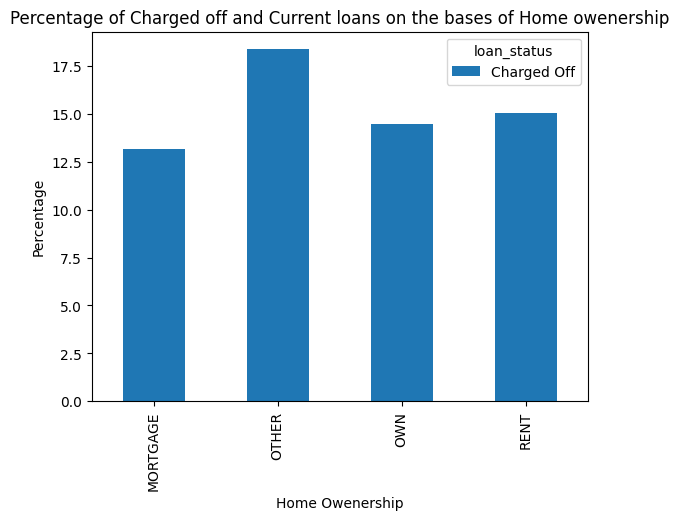

In [373]:
pivotHomeOwnership.loc[~pivotHomeOwnership.home_ownership.str.contains("NONE|All", case=False, regex=True)].plot.bar(x="home_ownership")

plt.xlabel("Home Owenership")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off and Current loans on the bases of Home owenership")

plt.show()

**Analyis 5**: *(Univariate Analysis)* for analysing effect of purpose of loan mentioned on charged off loans.

/tmp/ipykernel_5965/4251354185.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotByPurpose = pd.pivot_table(data=loadData.groupby("purpose").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/4251354185.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivotByPurpose = pd.pivot_table(data=loadData.groupby("purpose").loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/4251354185.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly

<Axes: xlabel='Charged Off', ylabel='purpose'>

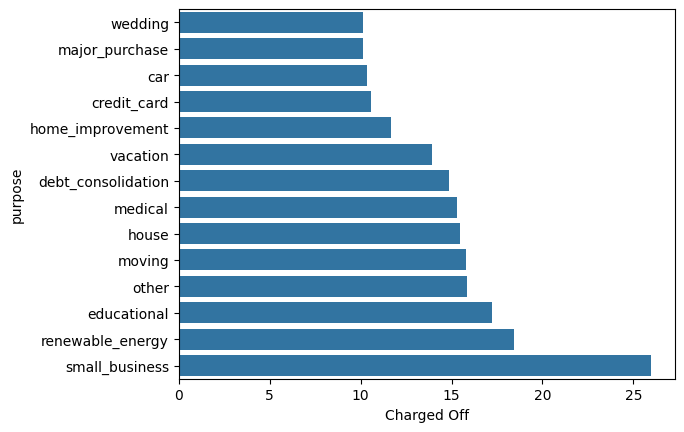

In [374]:
pivotByPurpose = pd.pivot_table(data=loadData.groupby("purpose").loan_status.value_counts().reset_index(), 
                                index="purpose", 
                                columns="loan_status",
                                fill_value= 0, 
                                values="count", 
                                aggfunc=np.sum, 
                                margins=True)

pivotByPurpose["Charged Off"] = pivotByPurpose.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)
pivotByPurpose["Current"] = pivotByPurpose.apply(lambda row: round((row["Current"]/row["All"])*100, 2), axis=1)
pivotByPurpose["Fully Paid"] = pivotByPurpose.apply(lambda row: round((row["Fully Paid"]/row["All"])*100, 2), axis=1)


pivotByPurpose.drop(labels=["All"], axis=1, inplace=True)
pivotByPurpose.reset_index(inplace=True)
pivotByPurpose.sort_values("Charged Off", inplace=True)

sns.barplot(data=pivotByPurpose.loc[pivotByPurpose.purpose != "All"], y="purpose", x="Charged Off")

**Analyis 6**: *(Bivariate Analysis)* for analysing effect of varfication status and derogatory public records on charged off loans.

In [457]:
pivoteVerificationPubrec = pd.pivot_table(data=loadData.groupby(["verification_status","pub_rec"]).loan_status.value_counts().reset_index(), 
                                          values="count", 
                                          index=["verification_status","pub_rec"], 
                                          columns="loan_status",
                                          fill_value=0,
                                          margins=True,
                                          aggfunc=np.sum)

pivoteVerificationPubrec["Charged Off"] = pivoteVerificationPubrec.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)
pivoteVerificationPubrec["Current"] = pivoteVerificationPubrec.apply(lambda row: round((row["Current"]/row["All"])*100, 2), axis=1)

pivoteVerificationPubrec.loc[pivoteVerificationPubrec["Charged Off"] > 14.17].sort_values("Charged Off", ascending=False).head(50)

pivoteVerificationPubrec.drop(columns=["All", "Fully Paid"], inplace=True)
pivoteVerificationPubrec.drop(index="All", inplace=True)
pivoteVerificationPubrec.reset_index(inplace=True)

pivoteVerificationPubrec

/tmp/ipykernel_5965/154783897.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivoteVerificationPubrec = pd.pivot_table(data=loadData.groupby(["verification_status","pub_rec"]).loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/154783897.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivoteVerificationPubrec = pd.pivot_table(data=loadData.groupby(["verification_status","pub_rec"]).loan_status.value_counts().reset_index(),
/tmp/ipykernel_5965/154783897.py:1: FutureWarning: The provided callable <function sum at 0x7dc05c2fb880> is currently using DataFrameGroupBy.sum. In a futu

loan_status,verification_status,pub_rec,Charged Off,Current
0,Not Verified,0,12.24,1.39
1,Not Verified,1,19.89,0.54
2,Not Verified,2,15.38,0.00
3,Not Verified,3,0.00,0.00
4,Not Verified,4,0.00,0.00
5,Source Verified,0,13.80,3.12
6,Source Verified,1,24.64,2.67
7,Source Verified,2,35.71,7.14
8,Source Verified,3,0.00,0.00
9,Verified,0,15.61,4.74


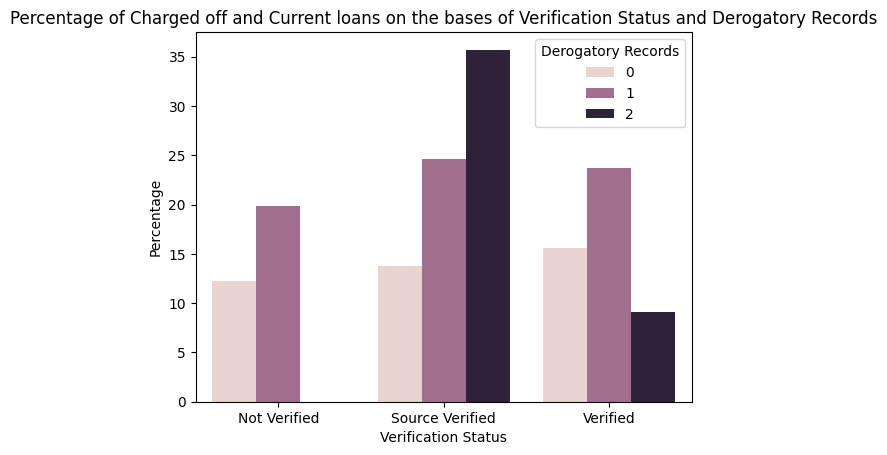

In [451]:
sns.barplot(data=pivoteVerificationPubrec.loc[(pivoteVerificationPubrec["Charged Off"] > 0) & (pivoteVerificationPubrec["Current"] > 0)], 
            x="verification_status", 
            y="Charged Off", 
            hue="pub_rec")

plt.xlabel("Verification Status")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off and Current loans on the bases of Verification Status and Derogatory Records")
plt.legend(title="Derogatory Records")

plt.show()

**Analyis 7**: *(Univariate Analysis)* for analysing effect of loan inquiries in past 6 months (excluding auto and mortgage inquiries) on charged off loans.

/tmp/ipykernel_5965/1778322291.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Derogatory Records")


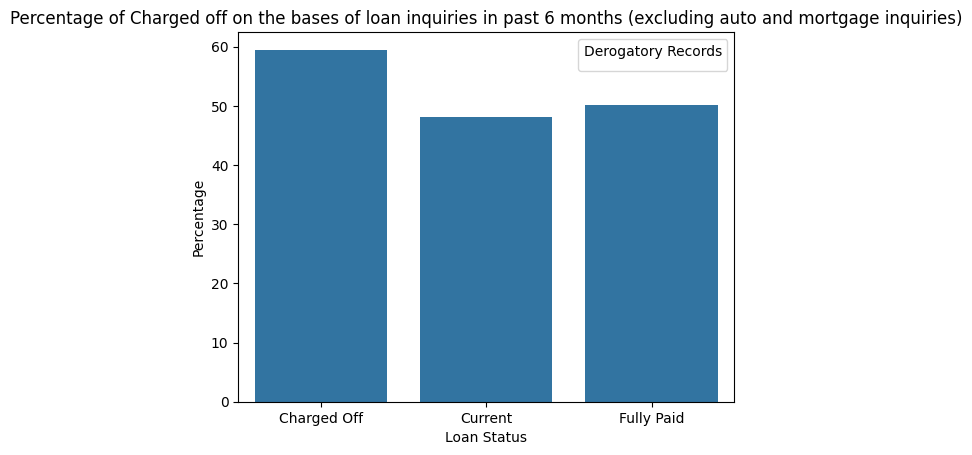

In [454]:
loanStatusInqWo = loadData.loc[loadData.inq_last_6mths > 0].groupby("loan_status").inq_last_6mths.count()

loanStatusInqAll = loadData.groupby("loan_status").inq_last_6mths.count()

loanStatusInq = pd.merge(left=loanStatusInqWo, right=loanStatusInqAll, on="loan_status")
loanStatusInq["precent"] = loanStatusInq.apply(lambda row: round((row.inq_last_6mths_x/row.inq_last_6mths_y) * 100, 2), axis=1)

sns.barplot(data=loanStatusInq, x="loan_status", y="precent")

plt.xlabel("Loan Status")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off on the bases of loan inquiries in past 6 months (excluding auto and mortgage inquiries)")
plt.legend(title="Derogatory Records")

plt.show()

**Analyis 8**: for analysing annual income

Removing outliers from annual income columns 

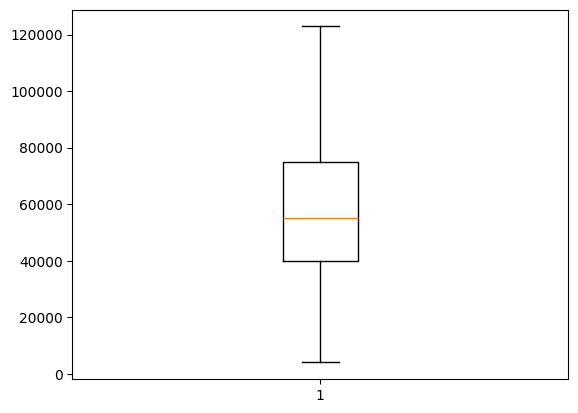

In [455]:

annulInc = loadData.loc[loadData.annual_inc < np.quantile(loadData.annual_inc, 0.92)]
plt.boxplot(data=annulInc, x="annual_inc")
plt.show()

<Axes: ylabel='Frequency'>

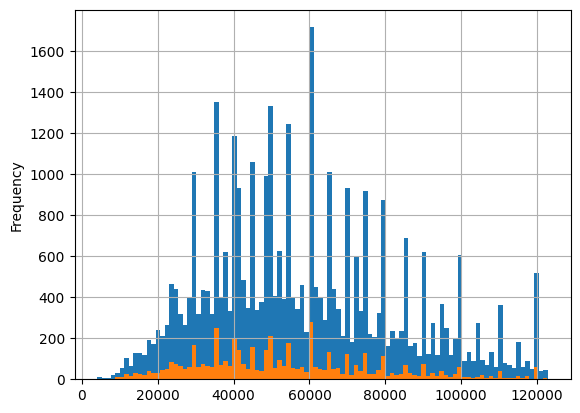

In [456]:
annulInc.annual_inc.plot.hist(bins=100, grid=True)
annulInc.loc[(loadData.loan_status == "Charged Off")].annual_inc.plot.hist(bins=100, grid=True)

**Analyis 9**: *(Biivariate Analysis)* for analysing employment length

In [524]:
pivotEmpLength = pd.pivot_table(data=loadData.groupby(["emp_length"]).loan_status.value_counts().reset_index(), values="count", index=["emp_length"], columns="loan_status", fill_value=0)

pivotEmpLength["year"] = pivotEmpLength.reset_index().emp_length.values
pivotEmpLength["year"] = pivotEmpLength.year.apply(lambda x: x.replace(" years", "").replace(" year", "").replace("10+", "11").replace("< 1", "0.9"))
pivotEmpLength["year"] = pivotEmpLength["year"].astype("float")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '1 year'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '6 years'),
  Text(7, 0, '7 years'),
  Text(8, 0, '8 years'),
  Text(9, 0, '9 years'),
  Text(10, 0, '10+ years')])

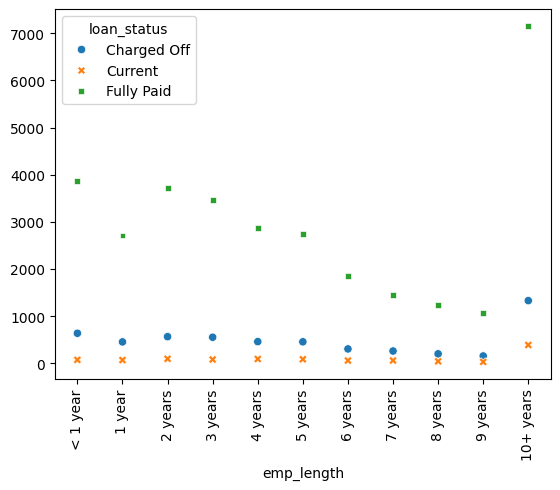

In [525]:
sns.scatterplot(data=pivotEmpLength.sort_values("year")[["Charged Off", "Current", "Fully Paid"]])
plt.xticks(rotation=90)

**Analyis 10**: for analysing number of open accounts

<Axes: >

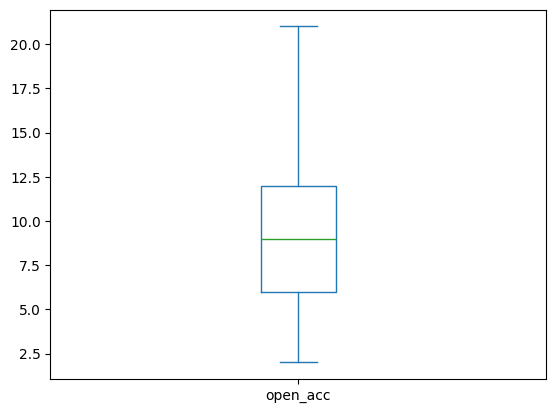

In [549]:
openAccountInfoWOOutliers = loadData.loc[loadData.open_acc < np.quantile(loadData.open_acc, 0.99)]

openAccountInfoWOOutliers.open_acc.plot.box()

<Axes: xlabel='open_acc'>

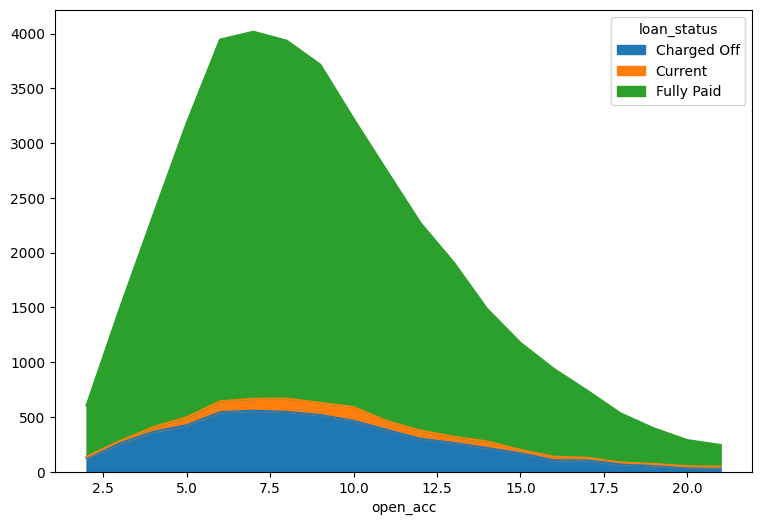

In [551]:
anlyOpenAcc = openAccountInfoWOOutliers.groupby("loan_status").open_acc.value_counts().reset_index().sort_values(["loan_status", "open_acc"])
pivotOpenAcc = pd.pivot_table(data=anlyOpenAcc, index="open_acc", columns="loan_status")
pivotOpenAcc.reset_index(inplace=True)

pivotOpenAcc.plot(kind="area", figsize=(9, 6), x="open_acc", y="count")

**Analyis 11**: for analysing ratio of monthly installments and income on charged off loans

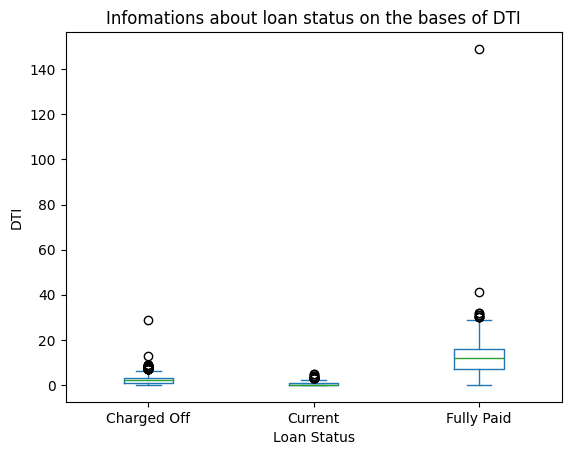

In [567]:
anaDti = loadData.groupby("loan_status").dti.value_counts().reset_index()
test = pd.pivot_table(data=anaDti, index="dti", columns="loan_status", values="count", fill_value=0)
test.plot.box()

plt.xlabel("Loan Status")
plt.ylabel("DTI")
plt.title("Infomations about loan status on the bases of DTI")

plt.show()

Outliers Cleaning

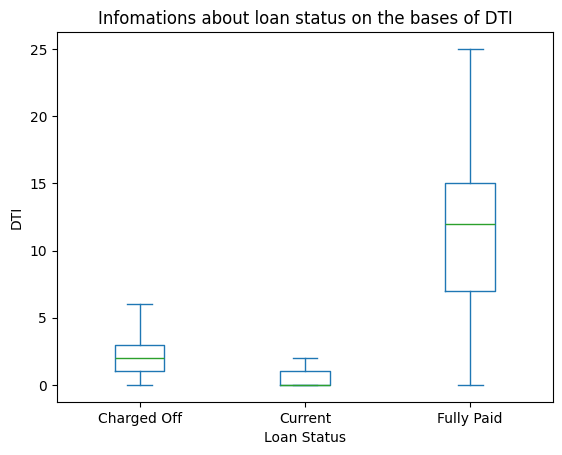

In [568]:
test.loc[(test["Fully Paid"] < np.quantile(test["Fully Paid"],0.99)) & 
         (test["Charged Off"] < np.quantile(test["Charged Off"],0.99))  & 
         (test["Current"] < np.quantile(test["Current"],0.99))].plot.box()

plt.xlabel("Loan Status")
plt.ylabel("DTI")
plt.title("Infomations about loan status on the bases of DTI")

plt.show()



**Analyis 11**: for analysing effect of last payment date on charged off loans. All loans having current status were given in year 2016. In 2012 and 2013 number of charged off were highest. 

/tmp/ipykernel_5965/3656863301.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loadData["issue_date"] = pd.to_datetime(loadData.loc[loadData.issue_d.notna()].issue_d.apply(lambda x: f'01-{x}'))


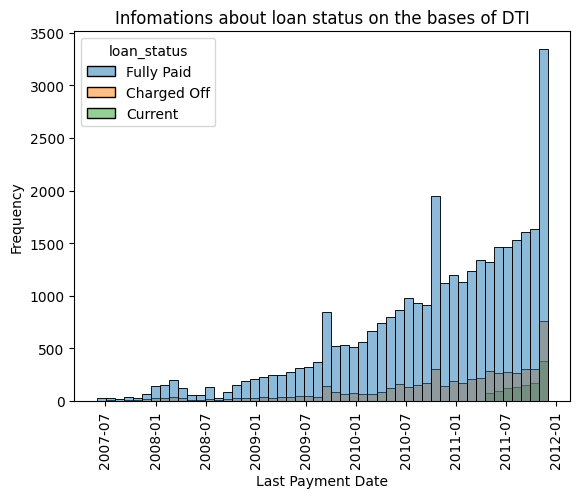

In [635]:
loadData["issue_date"] = pd.to_datetime(loadData.loc[loadData.issue_d.notna()].issue_d.apply(lambda x: f'01-{x}'))

sns.histplot(data=loadData, x="issue_date", hue="loan_status", bins=50)

plt.xlabel("Last Payment Date")
plt.ylabel("Frequency")
plt.title("Infomations about loan status on the bases of DTI")
plt.xticks(rotation=90)

plt.show()